
# Project: Gapminder Data for Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project, I'm working on Gapminder World Datasets, I downloaded the dataset as csv files therefore there was no need to use a spreedsheet package to export as csv. The dataset provides data for years ranging from 1800 to 2050 (predictions) in some indicator. In this project I will be working with data for 2008 and 2018 only, this giving us a 10 year gap for analysis.
>
> The indicators for analysis are:
>1. Income Variables (independent) - Gross domestic product per person adjusted for differences in purchasing power (Measured in International Dollars)
2. Life Expectancy - Measured in Years.
3. Babies per Woman - The number of babies that will be born to each woman with the prevailing age-specific fertility rate.
4. Working Hours per week - measured in hours. Total yearly amount of working hours divided by 52 weeks.
5. Human Development Index - ranges from 0 - 1
6. Happiness Score - expressed in Percentage
>
In the analysis, these are my research questions:
1. Which countries recorded the highest income in 2008 and 2018 respectively?
2. Do countries that make more Income produce more babies in 2008?
3. Which country is the happiest in 2008.
4. Are countries who make more Income happier in 2018?
5. What sort of correlation exist between the income made in a country and other indicators?
6. Which country's income improved the most in 2018 compared to 2008
7. Which Continent had the highest income 2018?
8. Which African countries had the lowest income in 2018?
9. Which country's income improved the most in 2018 compared to 2008?


In [1]:
# import all required packages and my selected files for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here I first load the data to Jupyter notebook then extracted the data for 2008 & 2018 for each indicators before merging them together and perform clean the data.

### General Properties

In [2]:
# loading the csv files
df_income = pd.read_csv('income_per_person.csv')
df_hdi = pd.read_csv('hdi.csv')
df_work = pd.read_csv('working_hours.csv')
df_happy = pd.read_csv('happiness_score.csv')
df_life = pd.read_csv('life_expectancy.csv')
df_child = pd.read_csv('children.csv')

In [3]:
# print the entire dataset to get a general overview of the data
print(df_income.head(2))
print(df_hdi.head(2))
print(df_work.head(2))
print(df_happy.head(2))
print(df_life.head(2))
print(df_child.head(2))

       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   674   674   674   674   674   674   674   674   674  ...   
1       Angola   691   693   697   700   702   705   709   712   716  ...   

   2041  2042  2043  2044  2045  2046  2047  2048  2049  2050  
0  2880  2940  3000  3070  3130  3200  3270  3340  3410  3480  
1  8040  8220  8390  8570  8750  8940  9120  9320  9520  9720  

[2 rows x 252 columns]
       country   1990   1991   1992   1993   1994   1995   1996   1997   1998  \
0  Afghanistan  0.302  0.307  0.316  0.312  0.307  0.331  0.335  0.339  0.344   
1       Angola    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   ...   2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  
0  ...  0.472  0.477  0.489  0.496  0.500  0.500  0.502  0.506  0.509  0.511  
1  ...  0.517  0.533  0.544  0.555  0.565  0.572  0.578  0.582  0.582  0.581  

[2 rows x 31 columns]
       country  1969  1970  1971  1972  1973  19

### Extracting each indicator from their respective tables
> Here I will extract the indicators required for the Year 2008, after getting the individual indicators then I'll merge them together on one table

#### Income Indicator

In [4]:
# To extract the data for 2008 in the income dataframe
# we need to first identify the index_no of both years on the table

# give column name
column_name1 = "2008"
column_name2 = "2018"
  
# find the index no
index_no1 = df_income.columns.get_loc(column_name1)
index_no2 = df_income.columns.get_loc(column_name2)
  
print("Index of the year {} column in given dataframe is: {}".format(column_name1, index_no1))
print("Index of the year {} column in given dataframe is: {}".format(column_name2, index_no2))

Index of the year 2008 column in given dataframe is: 209
Index of the year 2018 column in given dataframe is: 219


In [5]:
# extracting the income for the year 2008
df_income_08 = df_income.iloc[:, np.r_[:1, 209]]
df_income_08.rename(columns = {'2008' : 'income'}, inplace=True)
df_income_08.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\1077171683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_08.rename(columns = {'2008' : 'income'}, inplace=True)


,country,income
0,Afghanistan,1480
1,Angola,7820
2,Albania,9940
3,Andorra,46.3k
4,United Arab Emirates,68.8k


#### Human Development Index (HDI) indicator

In [6]:
# To extract the data for 2008 in the Human Development Index (HDI) dataframe
# we need to first identify the index_no of both years on the df_hdi table

# give column name
column_name1 = "2008"
column_name2 = "2018"
  
# find the index no
index_no1 = df_hdi.columns.get_loc(column_name1)
index_no2 = df_hdi.columns.get_loc(column_name2)
  
print("Index of the year {} column in given dataframe is: {}".format(column_name1, index_no1))
print("Index of the year {} column in given dataframe is: {}".format(column_name2, index_no2))

Index of the year 2008 column in given dataframe is: 19
Index of the year 2018 column in given dataframe is: 29


In [7]:
# extracting the income for the year 2008
df_hdi_08 = df_hdi.iloc[:, np.r_[:1, 19]]
df_hdi_08.rename(columns = {'2008' : 'hdi'}, inplace=True)
df_hdi_08.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\3179064616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdi_08.rename(columns = {'2008' : 'hdi'}, inplace=True)


,country,hdi
0,Afghanistan,0.447
1,Angola,0.501
2,Albania,0.728
3,Andorra,0.840
4,United Arab Emirates,0.821


#### Working Hours indicator

In [8]:
# To extract the data for 2008 in the working hours dataframe
# we need to first identify the index_no of both years on the table

# give column name
column_name1 = "2008"
column_name2 = "2018"
  
# find the index no
index_no1 = df_work.columns.get_loc(column_name1)
index_no2 = df_work.columns.get_loc(column_name2)
  
print("Index of the year {} column in given dataframe is: {}".format(column_name1, index_no1))
print("Index of the year {} column in given dataframe is: {}".format(column_name2, index_no2))

Index of the year 2008 column in given dataframe is: 40
Index of the year 2018 column in given dataframe is: 50


In [9]:
df_work_08 = df_work.iloc[:, np.r_[:1, 40]]
df_work_08.rename(columns = {'2008' : 'working_hours'}, inplace=True)
df_work_08.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\2553474000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_08.rename(columns = {'2008' : 'working_hours'}, inplace=True)


,country,working_hours
0,Aruba,NaN
1,Afghanistan,NaN
2,Albania,42.2
3,United Arab Emirates,NaN
4,Argentina,38.9


#### Happiness Score Indicator

In [10]:
# To extract the data for 2008 in the happiness score dataframe
# we need to first identify the index_no of both years on the table

# give column name
column_name1 = "2008"
column_name2 = "2018"
  
# find the index no
index_no1 = df_happy.columns.get_loc(column_name1)
index_no2 = df_happy.columns.get_loc(column_name2)
  
print("Index of the year {} column in given dataframe is: {}".format(column_name1, index_no1))
print("Index of the year {} column in given dataframe is: {}".format(column_name2, index_no2))

Index of the year 2008 column in given dataframe is: 4
Index of the year 2018 column in given dataframe is: 14


In [11]:
df_happy_08 = df_happy.iloc[:, np.r_[:1, 4]]
df_happy_08.rename(columns = {'2008' : 'happiness_score'}, inplace=True)
df_happy_08.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\3790599997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_08.rename(columns = {'2008' : 'happiness_score'}, inplace=True)


,country,happiness_score
0,Afghanistan,37.2
1,Angola,NaN
2,Albania,NaN
3,United Arab Emirates,NaN
4,Argentina,59.6


#### Life Expectancy Indicator

In [12]:
# To extract the data for 2008 in the Life Expectancy dataframe
# we need to first identify the index_no of both years on the Life expectancy table

# give column name
column_name1 = "2008"
column_name2 = "2018"
  
# find the index no
index_no1 = df_life.columns.get_loc(column_name1)
index_no2 = df_life.columns.get_loc(column_name2)
  
print("Index of the year {} column in given dataframe is: {}".format(column_name1, index_no1))
print("Index of the year {} column in given dataframe is: {}".format(column_name2, index_no2))

Index of the year 2008 column in given dataframe is: 209
Index of the year 2018 column in given dataframe is: 219


In [13]:
df_life_08 = df_life.iloc[:, np.r_[:1, 209]]
df_life_08.rename(columns = {'2008' : 'life_expectancy'}, inplace=True)
df_life_08.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\4087144060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_life_08.rename(columns = {'2008' : 'life_expectancy'}, inplace=True)


,country,life_expectancy
0,Afghanistan,59.2
1,Angola,58.8
2,Albania,77.6
3,Andorra,81.8
4,United Arab Emirates,70.4


#### Children per woman

In [14]:
# To extract the data for 2008 in the child per woman dataframe
# we need to first identify the index_no of both years on the table

# give column name
column_name1 = "2008"
column_name2 = "2018"
  
# find the index no
index_no1 = df_child.columns.get_loc(column_name1)
index_no2 = df_child.columns.get_loc(column_name2)
  
print("Index of the year {} column in the dataframe is: {}".format(column_name1, index_no1))
print("Index of the year {} column in the dataframe is: {}".format(column_name2, index_no2))

Index of the year 2008 column in the dataframe is: 209
Index of the year 2018 column in the dataframe is: 219


In [15]:
df_child_08 = df_child.iloc[:, np.r_[:1, 209]]
df_child_08.rename(columns = {'2008' : 'child_per_woman'}, inplace=True)
df_child_08.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\1339008708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child_08.rename(columns = {'2008' : 'child_per_woman'}, inplace=True)


,country,child_per_woman
0,Aruba,1.73
1,Afghanistan,6.25
2,Angola,6.31
3,Albania,1.65
4,Netherlands Antilles,1.97


> We will merge all the extracted data for 2008 into a singular table
To do this, I learnt about this merging technique all thanks to this article on <a href='https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes'>Stackoverflow</a> and the pandas Dataframe.merge <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html'>documentation</a>.

In [16]:
# To avoid running multiple merge, we can import functools to help with this.
from functools import reduce

In [18]:
# I had tried the commented code below, but that will require multiple merge for all indicators
#df_child_life = pd.merge(df_child_08, df_life_08, how="inner", on=None, left_on='country', right_on='country')

data_frames = [df_income_08,df_child_08,df_life_08,df_happy_08,df_work_08,df_hdi_08]
df_08 = reduce(lambda  left,right: pd.merge(left,right,on=['country'], how='inner', left_index=False, right_index=False), data_frames)

In [19]:
df_08.head()

,country,income,child_per_woman,life_expectancy,happiness_score,working_hours,hdi
0,Afghanistan,1480,6.25,59.2,37.2,NaN,0.447
1,Albania,9940,1.65,77.6,NaN,42.2,0.728
2,United Arab Emirates,68.8k,1.95,70.4,NaN,NaN,0.821
3,Argentina,23.1k,2.40,75.7,59.6,38.9,0.821
4,Armenia,10.5k,1.40,73.5,46.5,42.1,0.745


### We repeat the same process to extract the values for our indicators in the year 2018
>The index for the 2018 columns was queried above, that is the index I will work with here

In [20]:
# extracting the income for the year 2018
df_income_18 = df_income.iloc[:, np.r_[:1, 219]]
df_income_18.rename(columns = {'2018' : 'income'}, inplace=True)
df_income_18.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\829764685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_18.rename(columns = {'2018' : 'income'}, inplace=True)


,country,income
0,Afghanistan,2030
1,Angola,6930
2,Albania,13.4k
3,Andorra,57.6k
4,United Arab Emirates,67k


In [26]:
# extracting the hdi data for the year 2018
df_hdi_18 = df_hdi.iloc[:, np.r_[:1, 29]]
df_hdi_18.rename(columns = {'2018' : 'hdi'}, inplace=True)
df_hdi_18.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\735941113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hdi_18.rename(columns = {'2018' : 'hdi'}, inplace=True)


,country,hdi
0,Afghanistan,0.509
1,Angola,0.582
2,Albania,0.792
3,Andorra,0.867
4,United Arab Emirates,0.889


In [21]:
# extracting the working hours data for the year 2018
df_work_18 = df_work.iloc[:, np.r_[:1, 50]]
df_work_18.rename(columns = {'2018' : 'working_hours'}, inplace=True)
df_work_18.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\2488191282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_18.rename(columns = {'2018' : 'working_hours'}, inplace=True)


,country,working_hours
0,Aruba,NaN
1,Afghanistan,NaN
2,Albania,40.6
3,United Arab Emirates,NaN
4,Argentina,35.8


In [22]:
# extracting the happiness score data for the year 2018
df_happy_18 = df_happy.iloc[:, np.r_[:1, 14]]
df_happy_18.rename(columns = {'2018' : 'happiness_score'}, inplace=True)
df_happy_18.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\1194848707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_18.rename(columns = {'2018' : 'happiness_score'}, inplace=True)


,country,happiness_score
0,Afghanistan,26.9
1,Angola,NaN
2,Albania,50.0
3,United Arab Emirates,66.0
4,Argentina,57.9


In [23]:
# extracting the life expectancy data for the year 2018
df_life_18 = df_life.iloc[:, np.r_[:1, 219]]
df_life_18.rename(columns = {'2018' : 'life_expectancy'}, inplace=True)
df_life_18.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\3595710669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_life_18.rename(columns = {'2018' : 'life_expectancy'}, inplace=True)


,country,life_expectancy
0,Afghanistan,62.7
1,Angola,64.6
2,Albania,78.4
3,Andorra,82.1
4,United Arab Emirates,73.7


In [24]:
# extracting the child per woman data for the year 2018
df_child_18 = df_child.iloc[:, np.r_[:1, 219]]
df_child_18.rename(columns = {'2018' : 'child_per_woman'}, inplace=True)
df_child_18.head()

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\2683209617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_child_18.rename(columns = {'2018' : 'child_per_woman'}, inplace=True)


,country,child_per_woman
0,Aruba,1.80
1,Afghanistan,4.33
2,Angola,5.55
3,Albania,1.71
4,Netherlands Antilles,1.84


#### Merging the 2018 Data

In [27]:
# To avoid running multiple merge, we used the functools to merge the dataset as done with the 2008 Dataset
data_frames = [df_income_18,df_child_18,df_life_18,df_happy_18,df_work_18,df_hdi_18]
df_18 = reduce(lambda  left,right: pd.merge(left,right,on=['country'], how='inner', left_index=False, right_index=False), data_frames)

In [29]:
df_18.head()

,country,income,child_per_woman,life_expectancy,happiness_score,working_hours,hdi
0,Afghanistan,2030,4.33,62.7,26.9,NaN,0.509
1,Albania,13.4k,1.71,78.4,50.0,40.6,0.792
2,United Arab Emirates,67k,1.72,73.7,66.0,NaN,0.889
3,Argentina,22.8k,2.26,76.5,57.9,35.8,0.842
4,Armenia,12.7k,1.60,75.6,50.6,38.0,0.771


### Data Cleaning 
WIth the above steps I was able to generate two key dataframes that will be used for the analysis. The next steps is to dig deeper into the dataset. Clean the data further before working on the exploratory Data Analysis

In [28]:
# General overview of the dataset
print(df_08.shape)
df_08.head()

(139, 7)


,country,income,child_per_woman,life_expectancy,happiness_score,working_hours,hdi
0,Afghanistan,1480,6.25,59.2,37.2,NaN,0.447
1,Albania,9940,1.65,77.6,NaN,42.2,0.728
2,United Arab Emirates,68.8k,1.95,70.4,NaN,NaN,0.821
3,Argentina,23.1k,2.40,75.7,59.6,38.9,0.821
4,Armenia,10.5k,1.40,73.5,46.5,42.1,0.745


In [29]:
# General overview of the dataset
print(df_08.shape)
df_08.head()

(139, 7)


,country,income,child_per_woman,life_expectancy,happiness_score,working_hours,hdi
0,Afghanistan,1480,6.25,59.2,37.2,NaN,0.447
1,Albania,9940,1.65,77.6,NaN,42.2,0.728
2,United Arab Emirates,68.8k,1.95,70.4,NaN,NaN,0.821
3,Argentina,23.1k,2.40,75.7,59.6,38.9,0.821
4,Armenia,10.5k,1.40,73.5,46.5,42.1,0.745


In [30]:
df_08.isnull().sum()

country             0
income              0
child_per_woman     0
life_expectancy     0
happiness_score    38
working_hours      74
hdi                 0
dtype: int64

In [31]:
df_18.isnull().sum()

country             0
income              0
child_per_woman     0
life_expectancy     0
happiness_score    15
working_hours      52
hdi                 0
dtype: int64

In the above, we see a significant amount of null values in the working_hours column in both the 2018 dataset (above average) and the 2018 dataset (slightly below average). Therefore this column will be removed & will not be used for analysis.

Happiness_score has some null values; this will be dropped from both dataframes.

In [32]:
# to drop the null values on the happiness_score column
df_08.dropna(axis=0, how='any', subset=['happiness_score'], inplace=True)
df_18.dropna(axis=0, how='any', subset=['happiness_score'], inplace=True)

In [33]:
# To drop the working_hours column
df_08.drop(['working_hours'], axis=1, inplace=True)
df_18.drop(['working_hours'], axis=1, inplace=True)

>The null Values has been addressed.
>
>Next I check for duplicates

In [34]:
df_08.duplicated().sum()

0

In [35]:
df_18.duplicated().sum()

0

In [36]:
df_08.country.nunique()

101

In [37]:
df_18.country.nunique()

124

>After Removing null values the 2008 Dataset is left with **101 Countries** & the 2018 Dataset is left with **124 Countries**
>
> In the next section I will be cross-checking the DataTypes

In [38]:
# checking the datatypes on df_o8
print(df_08.dtypes)
df_08.head(3)

country             object
income              object
child_per_woman    float64
life_expectancy    float64
happiness_score    float64
hdi                float64
dtype: object


,country,income,child_per_woman,life_expectancy,happiness_score,hdi
0,Afghanistan,1480,6.25,59.2,37.2,0.447
3,Argentina,23.1k,2.40,75.7,59.6,0.821
4,Armenia,10.5k,1.40,73.5,46.5,0.745


In [39]:
# checking the datatypes on df_18
print(df_18.dtypes)
df_18.head(3)

country             object
income              object
child_per_woman    float64
life_expectancy    float64
happiness_score    float64
hdi                float64
dtype: object


,country,income,child_per_woman,life_expectancy,happiness_score,hdi
0,Afghanistan,2030,4.33,62.7,26.9,0.509
1,Albania,13.4k,1.71,78.4,50.0,0.792
2,United Arab Emirates,67k,1.72,73.7,66.0,0.889


In [40]:
df_08['income'].unique()

array(['1480', '23.1k', '10.5k', '45k', '53.3k', '12.9k', '828', '48.6k',
       '2740', '1630', '2660', '15.9k', '6350', '14.1k', '14.6k', '46k',
       '20.9k', '7410', '4530', '11.4k', '16.2k', '47.7k', '53.2k', '12k',
       '10.3k', '9760', '39.4k', '29.7k', '48.9k', '43.1k', '43.8k',
       '9360', '3470', '7360', '49.8k', '5010', '2760', '7660', '3710',
       '55.7k', '13.2k', '8630', '51.9k', '34.2k', '44.8k', '11.7k',
       '38.3k', '19.9k', '3140', '4140', '2860', '32.4k', '4300', '17k',
       '1370', '8270', '26.9k', '24.8k', '8470', '1700', '18.5k', '2010',
       '958', '4920', '20.1k', '1010', '4460', '4690', '54k', '63.8k',
       '2180', '38k', '3910', '20.6k', '9340', '5620', '9640', '4970',
       '25k', '1390', '45.3k', '71.5k', '1360', '7390', '48.1k', '13.6k',
       '2130', '20k', '1900', '1760', '55.3k', '20.7k', '4630', '12.6k',
       '2750', '1740'], dtype=object)

In [41]:
df_18['income'].unique()

array(['2030', '13.4k', '67k', '22.8k', '12.7k', '49.3k', '55.5k',
       '14.2k', '762', '51.3k', '3160', '2120', '4440', '22.3k', '14.4k',
       '18.9k', '8660', '14.6k', '17.6k', '48.8k', '68.2k', '25.2k',
       '15.2k', '4840', '3910', '3070', '20.1k', '38.8k', '40.1k',
       '53.6k', '56.5k', '17.7k', '11.6k', '11.4k', '40.4k', '35.3k',
       '2100', '48.3k', '45.5k', '46.3k', '14.3k', '2160', '29.9k',
       '8450', '5670', '27.9k', '2990', '6500', '83.4k', '13.5k', '39.6k',
       '42.2k', '10k', '41.3k', '25.5k', '4200', '5130', '4160', '42.1k',
       '7590', '15.6k', '1500', '12.9k', '35.5k', '114k', '30.1k', '7440',
       '12.4k', '1610', '20k', '16.1k', '2280', '43.2k', '5030', '20.8k',
       '11.9k', '1290', '5040', '22.2k', '1040', '27.6k', '9930', '1200',
       '5160', '5700', '56.2k', '64.7k', '3250', '4740', '31k', '12.8k',
       '8520', '34.1k', '6320', '28.6k', '26.7k', '2090', '47.6k', '3320',
       '97.7k', '1660', '8620', '17.5k', '31.3k', '38.1k', '52.5k

From the above; there is an issue with income data type (showing as an object) instead of an Integer. Checking the Unique Values in the column we see the income data of some row values has been approximated to include a K, this represents the float value preceding multiply by 1000./n
Secondly, A woman cannot have a half child; therefore the values on child_per_woman column will be changed to integers.

The next section, I will be doing the following:
1. Manipulating the income column to convert the K to *1000 without affecting other values on the column & change the datatype to Integer. Thanks to this  <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html">documentation</a> and <a href="https://pandas.pydata.org/docs/reference/api/pandas.eval.html">pandas.eval.</a>
2. Approximating the Child Per Woman column and changing the datatype to integers

In [42]:
# I define a new variable assigning *1000 to any 'k' string in the df_08 income column
df_08_adjusted = df_08['income'].replace({'[kK]': '*1000'}, regex=True)
# Then I assigned the value of the new variable to the income column of the df_08 dataframe
# I used pd.eval to valuate expression
# .astype to convert the column to integer
df_08['income'] = df_08_adjusted.map(pd.eval).astype(int)

In [43]:
# I define a new variable assigning *1000 to any 'k' string in the df_18 income column
df_18_adjusted = df_18['income'].replace({'[kK]': '*1000'}, regex=True)

# Then I assigned the value of the new variable to the income column of the df_18 dataframe
# I used pd.eval to valuate the expression
# .astype to convert the column to integer

df_18['income'] = df_18_adjusted.map(pd.eval).astype(int)

In [44]:
# round up the child per woman column.
df_08['child_per_woman'] = round(df_08['child_per_woman']).astype(int)
df_18['child_per_woman'] = round(df_18['child_per_woman']).astype(int)

In [45]:
# checking the datatypes again
print(df_08.dtypes)
df_08.head(3)

country             object
income               int32
child_per_woman      int32
life_expectancy    float64
happiness_score    float64
hdi                float64
dtype: object


,country,income,child_per_woman,life_expectancy,happiness_score,hdi
0,Afghanistan,1480,6,59.2,37.2,0.447
3,Argentina,23100,2,75.7,59.6,0.821
4,Armenia,10500,1,73.5,46.5,0.745


In [46]:
# checking the datatypes again
print(df_18.dtypes)
df_18.head(3)

country             object
income               int32
child_per_woman      int32
life_expectancy    float64
happiness_score    float64
hdi                float64
dtype: object


,country,income,child_per_woman,life_expectancy,happiness_score,hdi
0,Afghanistan,2030,4,62.7,26.9,0.509
1,Albania,13400,2,78.4,50.0,0.792
2,United Arab Emirates,67000,2,73.7,66.0,0.889


<a id='eda'></a>
## Exploratory Data Analysis
The dataset has been cleaned fully, this section we will look be exploring the dataset to generate insight based on the questions generated in the Introduction to this project

### General overview of the dataset

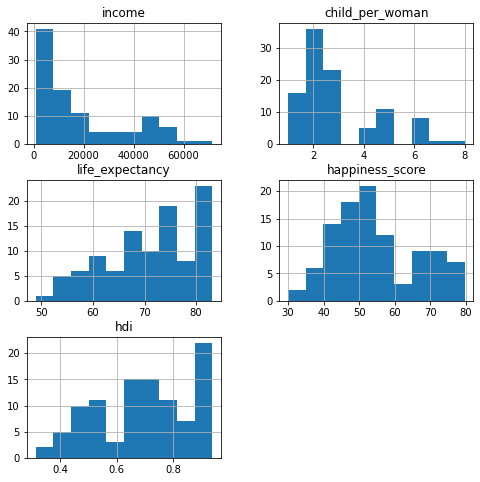

In [47]:
df_08.hist(figsize =(8,8));

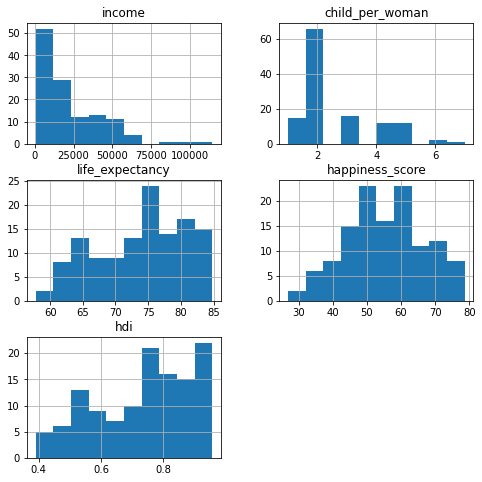

In [48]:
df_18.hist(figsize =(8,8));

The general chart for both 2008 & 2018 data shows that the income is heavily skewed to the right, this could mean there's a huge income gap between some countries.

The **Life expectancy** is also heavily skewed to the left.

#### Checking for outliers

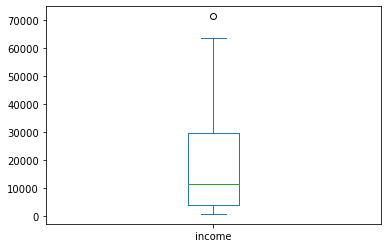

In [49]:
df_08['income'].plot(kind='box');

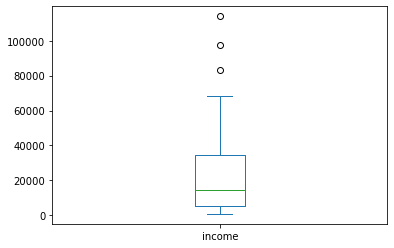

In [50]:
df_18['income'].plot(kind='box');

THe box plot for the income rows in 2008 & 2018 above shows some Outliers. This could mean some coutries earn significantly higher than many other countries (thus those coutries income is counted as an outlier).

In [51]:
df_08.describe()

,income,child_per_woman,life_expectancy,happiness_score,hdi
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,18596.594059,2.920792,70.868317,54.544554,0.690782
std,18343.039627,1.616683,8.598371,11.763592,0.166101
min,828.000000,1.000000,48.900000,30.000000,0.314000
25%,4140.000000,2.000000,65.000000,45.900000,0.535000
50%,11400.000000,2.000000,72.100000,51.700000,0.716000
75%,29700.000000,4.000000,78.500000,64.100000,0.828000
max,71500.000000,8.000000,83.100000,79.700000,0.937000


In [52]:
df_18.describe()

,income,child_per_woman,life_expectancy,happiness_score,hdi
count,124.000000,124.000000,124.000000,124.000000,124.00000
mean,22040.177419,2.596774,73.819355,55.238710,0.73704
std,21523.511493,1.274639,6.901074,11.294223,0.15490
min,762.000000,1.000000,57.800000,26.900000,0.39100
25%,5107.500000,2.000000,68.475000,47.425000,0.60350
50%,14250.000000,2.000000,75.200000,54.800000,0.76700
75%,34400.000000,3.000000,79.925000,62.875000,0.86625
max,114000.000000,7.000000,84.800000,78.600000,0.95600


The above further confirms what we saw from the Box Plot:
There's a significant gap in the income of some countries compared to their counterparts in other countries.

## Questions for Analysis

### Which countries recorded the highest income in 2008 and 2018 respectively?

In [53]:
#high_income_08 = df_08[df_08['income'] == df_08.income.max()]
#df_select = high_income_08.iloc[:,]
#df_select
#co_name = df_select['country']
#co_income = df_select['country']

df_08.iloc[df_08['income'].argsort()[-3:]]

,country,income,child_per_woman,life_expectancy,happiness_score,hdi
57,Ireland,55700,2,80.0,75.7,0.911
100,Norway,63800,2,80.9,76.3,0.937
117,Singapore,71500,1,82.1,66.4,0.888


The countries that returned the highest income in 2008 are:
1. Singapore: 71500
2. Norway: 63800
3. Ireland: 55700

In [54]:
#df_18[df_18['income'] == df_18.income.max()]
df_18.iloc[df_18.income.argsort()[-3:]]

,country,income,child_per_woman,life_expectancy,happiness_score,hdi
57,Ireland,83400,2,82.0,69.6,0.951
117,Singapore,97700,1,84.7,63.7,0.936
77,Luxembourg,114000,2,82.9,72.4,0.913


The countries that returned the highest income in 2018 are:
1. Luxembourg: 114000
2. Singapore: 97700
3. Ireland: 83400

### Do countries that make more Income produce more babies in 2008?

In [55]:
# we will derive the average income across all countries
mid_income_08 = df_08['income'].median()
mid_income_08

11400.0

In [56]:
# seperating the low income countries from those with a higher income
low_income_countries = df_08.query('income < 11400')

high_income_countries = df_08.query('income >= 11400')

# dataframe_name.groupby(['column1_to_groupby', 'column2_to_groupby'], as_index=False)['column_to_show'].mean()

In [57]:
mean_low_income = low_income_countries['child_per_woman'].mean()
mean_high_income = high_income_countries['child_per_woman'].mean()

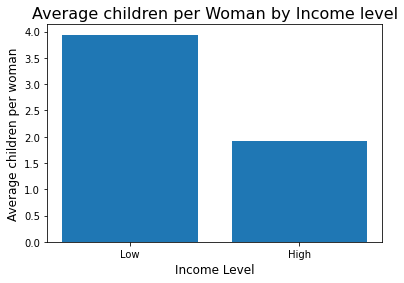

In [58]:
# Visualizing the difference in birth by income
xlocal = [1, 2]
heights = [mean_low_income, mean_high_income]
labels = ['Low', 'High']
plt.bar(xlocal, heights, tick_label=labels)
plt.title('Average children per Woman by Income level', fontsize=16)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Average children per woman', fontsize=12);

The visual above shows that the low income earning countries produce more children significantly when compared with the higher income earning countries

### Which country was the happiest in 2008

In [59]:
happy_country = max(df_08['happiness_score'])

In [60]:
df_08[df_08['happiness_score']== happy_country]

,country,income,child_per_woman,life_expectancy,happiness_score,hdi
34,Denmark,53200,2,79.0,79.7,0.917


The Happiest country in 2008 according to the happiness score was **Denmark**

###  Are countries who make more Income happier in 2018?

In [61]:
# we will derive the average income across all countries in 2018
mid_income_18 = df_18['income'].median()
mid_income_18

14250.0

In [62]:
# seperating the low income countries from those with a higher income in 2018
low_income_countries_18 = df_08.query('income < {}'.format(mid_income_18))

high_income_countries_18 = df_08.query('income >= {}'.format(mid_income_18))


In [63]:
mean_low_income_18 = low_income_countries_18['happiness_score'].mean()
mean_high_income_18 = high_income_countries_18['happiness_score'].mean()

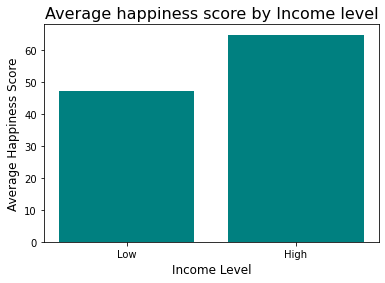

In [64]:
# Visualizing the happiness score by income levels
xlocal = [1, 2]
heights = [mean_low_income_18, mean_high_income_18]
labels = ['Low', 'High']
colours = ['Teal', 'Teal']
plt.bar(xlocal, heights, tick_label=labels, color=colours)
plt.title('Average happiness score by Income level', fontsize=16)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Average Happiness Score', fontsize=12);

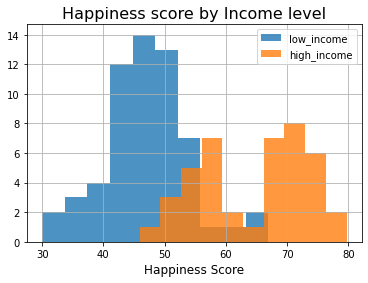

In [65]:
low_income_countries_18.happiness_score.hist(alpha = 0.8, label='low_income')
high_income_countries_18.happiness_score.hist(alpha = 0.8, label='high_income')
plt.title('Happiness score by Income level', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.legend();

The above distributions shows the happiness score between high income countries and low income countries. We see clearly from the visual that high income countries are happier than those in low incomes countries

### What sort of correlation exist between the income made in a country and other indicators?

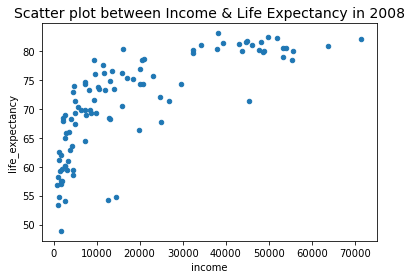

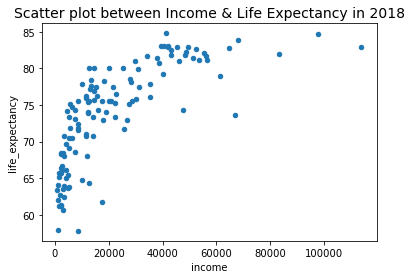

In [67]:
df_08.plot(x='income', y= 'life_expectancy', kind = 'scatter')
plt.title('Scatter plot between Income & Life Expectancy in 2008', fontsize=14)
df_18.plot(x='income', y= 'life_expectancy', kind = 'scatter')
plt.title('Scatter plot between Income & Life Expectancy in 2018', fontsize=14);

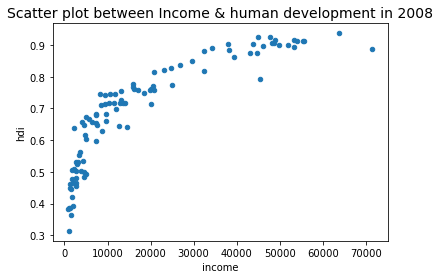

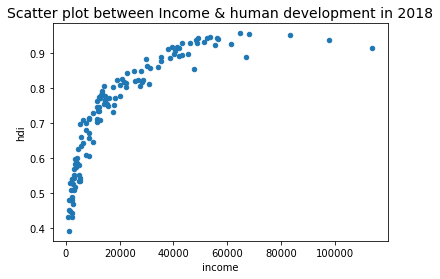

In [68]:
df_08.plot(x='income', y= 'hdi', kind = 'scatter')
plt.title('Scatter plot between Income & human development in 2008', fontsize=14)
df_18.plot(x='income', y= 'hdi', kind = 'scatter')
plt.title('Scatter plot between Income & human development in 2018', fontsize=14);

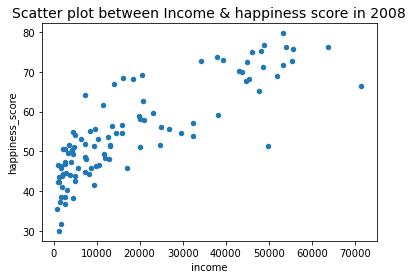

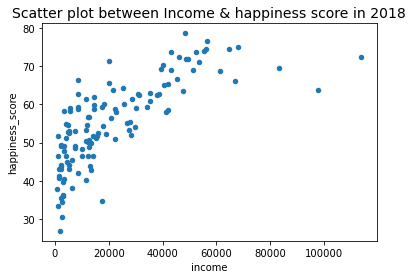

In [69]:
df_08.plot(x='income', y= 'happiness_score', kind = 'scatter')
plt.title('Scatter plot between Income & happiness score in 2008', fontsize=14)
df_18.plot(x='income', y= 'happiness_score', kind = 'scatter')
plt.title('Scatter plot between Income & happiness score in 2018', fontsize=14);

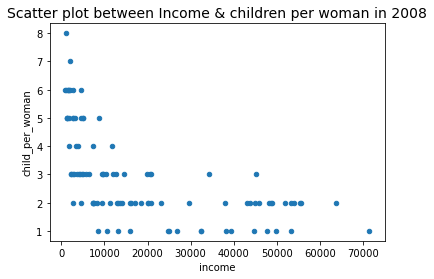

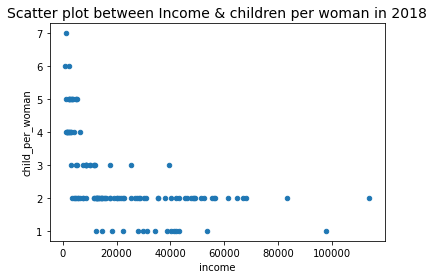

In [70]:
df_08.plot(x='income', y= 'child_per_woman', kind = 'scatter')
plt.title('Scatter plot between Income & children per woman in 2008', fontsize=14)
df_18.plot(x='income', y= 'child_per_woman', kind = 'scatter')
plt.title('Scatter plot between Income & children per woman in 2018', fontsize=14);

The above scatter plot shows that the income made in a country has apositive corrlation with other indicators of the analysis except with Chidren per Woman which shows a Negative correlation.

### Which Continent had the highest income 2018?

In [72]:
# To return the continent with the highest income, we must first group country column to their respective continent
# Thus, I'll first define the seven continents as a list
asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Lao', 'Bangladesh', 'Kyrgyz Republic', 'Hong Kong, China', 'Bhutan', 'British Indian Ocean Territory', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Egypt', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'East Timor', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Congo, Rep.', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', "Cote d'Ivoire", 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
europe = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Slovak Republic', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']
north_america =['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States']
south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New', 'Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

# I will get a list of all the countries on the df_18 dataframe
row = list(df_18['country'])

# Use a function to group countries to different continent
def continent(row):
    if row['country'] in asia:
        return 'Asia'
    elif row['country'] in africa:
        return 'Africa'
    elif row['country'] in europe:
        return 'Europe'
    elif row['country'] in north_america:
        return 'North_america'
    elif row['country'] in south_america:
        return 'South_america'
    elif row['country'] in oceania:
        return 'Oceania'
    else:
        return 'None'
    
#crosscheck = df_18.apply (lambda row: continent(row), axis=1) # use this to crosscheck the continents
#crosscheck
df_18['continent'] = df_18.apply (lambda row: continent(row), axis=1)

In [77]:
df_18.head(2)

,country,income,child_per_woman,life_expectancy,happiness_score,hdi,continent
0,Afghanistan,2030,4,62.7,26.9,0.509,Asia
1,Albania,13400,2,78.4,50.0,0.792,Europe


In [73]:
df_18[df_18['continent'] == 'None'] #This should not display any row value. i.e. all countries were successfully assigned to a continent.

,country,income,child_per_woman,life_expectancy,happiness_score,hdi,continent


In [74]:
# To return the continent with the highest income, we must first group country column to their respective continent
# Thus, I'll first define the seven continents as a list
asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Lao', 'Bangladesh', 'Kyrgyz Republic', 'Bhutan', 'British Indian Ocean Territory', 'Brunei', 'Cambodia', 'Hong Kong, China', 'China', 'Cyprus', 'Egypt', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'East Timor', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Congo, Rep.', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', "Cote d'Ivoire", 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
europe = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Slovak Republic', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']
north_america =['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States']
south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New', 'Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

# I will get a list of all the countries on the df_18 dataframe
row = list(df_08['country'])

# Use a function to group countries to different continent
def continent(row):
    if row['country'] in asia:
        return 'Asia'
    elif row['country'] in africa:
        return 'Africa'
    elif row['country'] in europe:
        return 'Europe'
    elif row['country'] in north_america:
        return 'North_america'
    elif row['country'] in south_america:
        return 'South_america'
    elif row['country'] in oceania:
        return 'Oceania'
    else:
        return 'None'
    
#crosscheck = df_18.apply (lambda row: continent(row), axis=1)
#crosscheck
df_08['continent'] = df_08.apply (lambda row: continent(row), axis=1)

In [76]:
df_08.head(2)

,country,income,child_per_woman,life_expectancy,happiness_score,hdi,continent
0,Afghanistan,1480,6,59.2,37.2,0.447,Asia
3,Argentina,23100,2,75.7,59.6,0.821,South_america


In [78]:
df_08[df_08['continent'] == 'None'] #This should not display any row value

,country,income,child_per_woman,life_expectancy,happiness_score,hdi,continent


In [126]:
continent_share = df_18.groupby(['continent'], as_index=False)['income'].mean()

In [129]:
continent_share.iloc[continent_share.income.argsort()[-1:]]

,continent,income
4,Oceania,46250.0


**Oceania** is the continent with the highest income on Average

### Which African countries had the lowest income in 2018?

In [90]:
african_countries = df_18[df_18['continent']== 'Africa']

In [94]:
african_countries.iloc[african_countries.income.argsort()[:3]]

,country,income,child_per_woman,life_expectancy,happiness_score,hdi,continent
8,Burundi,762,6,63.4,37.8,0.431,Africa
93,Malawi,1040,4,64.1,33.3,0.478,Africa
96,Niger,1200,7,62.0,51.6,0.391,Africa


The poorest countries in Africa are:
1. Burundi with an Average income of 762
2. Malawi with an Average income of 1040
3. Niger with an Average income of 1200

### Which country's income improved the most in 2018 compared to 2008?

To make comparison between both tables, I will merge both tables hereby working with only countries available in both the 2008  and 2018 tables.

In [96]:
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [97]:
df_08.head()

,country_2008,income_2008,child_per__2008,life_expec_2008,happiness__2008,hdi_2008,continent_2008
0,Afghanistan,1480,6,59.2,37.2,0.447,Asia
3,Argentina,23100,2,75.7,59.6,0.821,South_america
4,Armenia,10500,1,73.5,46.5,0.745,Asia
5,Australia,45000,2,81.7,72.5,0.926,Oceania
6,Austria,53300,1,80.5,71.8,0.893,Europe


In [98]:
combined = df_08.merge(df_18, left_on = 'country_2008', right_on = 'country', how= 'inner', left_index=False, right_index=False)

In [99]:
combined.head()

,country_2008,income_2008,child_per__2008,life_expec_2008,happiness__2008,hdi_2008,continent_2008,country,income,child_per_woman,life_expectancy,happiness_score,hdi,continent
0,Afghanistan,1480,6,59.2,37.2,0.447,Asia,Afghanistan,2030,4,62.7,26.9,0.509,Asia
1,Argentina,23100,2,75.7,59.6,0.821,South_america,Argentina,22800,2,76.5,57.9,0.842,South_america
2,Armenia,10500,1,73.5,46.5,0.745,Asia,Armenia,12700,2,75.6,50.6,0.771,Asia
3,Australia,45000,2,81.7,72.5,0.926,Oceania,Australia,49300,2,82.9,71.8,0.943,Oceania
4,Austria,53300,1,80.5,71.8,0.893,Europe,Austria,55500,2,82.1,74.0,0.921,Europe


In [105]:
income_info = combined[['country', 'income_2008', 'income']]

In [106]:
income_info.head()

,country,income_2008,income
0,Afghanistan,1480,2030
1,Argentina,23100,22800
2,Armenia,10500,12700
3,Australia,45000,49300
4,Austria,53300,55500


In [107]:
income_info['income_change'] = income_info['income'] - income_info['income_2008']

C:\Users\Henry Adeyemi\AppData\Local\Temp\ipykernel_4288\4196791062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_info['income_change'] = income_info['income'] - income_info['income_2008']


In [116]:
improved = income_info.income_change.max()

In [117]:
income_info[income_info['income_change'] == improved]

,country,income_2008,income,income_change
37,Ireland,55700,83400,27700


Ireland's income per person increased drastically in 2018 when compared with 2008, the country must be doing something right.

In [118]:
declined = income_info.income_change.min()

In [119]:
income_info[income_info['income_change'] == declined]

,country,income_2008,income,income_change
90,Venezuela,20700,12300,-8400


Venezuela's income per person on the other hand decreased drastically in 2018 when compared with 2008.

<a id='conclusions'></a>
## Conclusions

> This project analysed the income made in different countries and check for pattern with the Happiness_Score, Children Per Woman, Life Expectancy and the Human Development Index.

> From the analysis we can deduce that the income per person in each country has an impact on other indicators except the child per woman (this reduced as the income increases)

> Knowing the impact that the income per person in a country could have on the Human Development within the country is important for the growth of any country.
>
>> How could lower earning countries learn from those that earn significantly higher?
>> What could the High earning countries do to help these lower earning countries?
>> Some countries income decresed significantly compared to 2008. How did those countries get to that stage?

These are some questions that we could dig further into, this is out of the scope of this project

### Thank You!!